 # Probabilistic ICA -- data
 The model we consider is the censored Log-ICA.

In [1]:
import numpy as np 
import math, scipy
from scipy.stats import multivariate_normal, geom
import matplotlib.pyplot as plt

In [2]:
p = 2

In [3]:
pixels = 16
d = pixels**2
a1 = np.zeros([pixels, pixels])
a1[10:15, 10:15] = 1
a2 = np.zeros([pixels, pixels])
a2[1:9, 1:9] = 1
a2[1:3, 1:3] = 0
a2[7:9, 7:9] = 0
a2[1:3, 7:9] = 0
a2[7:9, 1:3] = 0

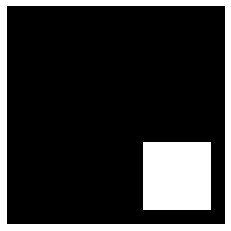

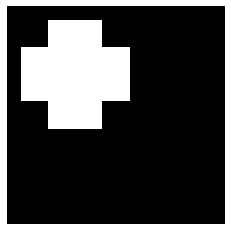

In [4]:
plt.gray()
plt.axis('off')
plt.imshow(a1)
# plt.savefig('a1.pdf', bbox_inches="tight")
plt.show()
plt.imshow(a2)
plt.axis('off')
# plt.savefig('a2.pdf', bbox_inches="tight")
plt.show()

In [5]:
A = np.transpose(np.array([a1.flatten(), a2.flatten()]))
sigma = 0.5
alpha = 0.8
mu = 0.0*np.ones(d)

In [6]:
ndata = 100
y = np.zeros([d, ndata])
for n in range(ndata):
    b = np.random.binomial(1, alpha, size = p)
    beta = np.random.logistic(scale = 1/2, size = p)
    z = b*beta
    y[:, n] = mu + np.matmul(z, A.T) + np.random.multivariate_normal(np.zeros(d), sigma**2*np.identity(d), 1)

In [7]:
y_tmp = np.matrix(y)
parameters = np.matrix(A)
parameters = np.vstack([parameters, [sigma, sigma]])
# parameters = np.vstack([parameters, [sigma, sigma]])

In [8]:
with open('censored_ica_data100.txt','wb') as f:
    for line in y_tmp:
        np.savetxt(f, line)

In [9]:
with open('ica_truth.txt','wb') as f:
    for line in parameters:
        np.savetxt(f, line)